In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import matplotlib.pyplot as plt
import os


print("Versão do TensorFlow:", tf.__version__)

Versão do TensorFlow: 2.20.0


In [3]:
IMG_SIZE = 160
BATCH_SIZE = 32


# Ajuste manual do caminho onde você extraiu o dataset
train_dir = r"cats_and_dogs_filtered\train"
validation_dir = r"cats_and_dogs_filtered\validation"


# Criar datasets
train = tf.keras.preprocessing.image_dataset_from_directory(
train_dir,
image_size=(IMG_SIZE, IMG_SIZE),
batch_size=BATCH_SIZE
)


validation = tf.keras.preprocessing.image_dataset_from_directory(
validation_dir,
image_size=(IMG_SIZE, IMG_SIZE),
batch_size=BATCH_SIZE
)


# Normalizar imagens com preprocess_input
train = train.map(lambda x, y: (preprocess_input(x), y))
validation = validation.map(lambda x, y: (preprocess_input(x), y))


# Melhorar performance
AUTOTUNE = tf.data.AUTOTUNE
train = train.cache().prefetch(buffer_size=AUTOTUNE)
validation = validation.cache().prefetch(buffer_size=AUTOTUNE)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [4]:
base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),
include_top=False,
weights='imagenet')
base_model.trainable = False


model = models.Sequential([
base_model,
layers.GlobalAveragePooling2D(),
layers.Dropout(0.2),
layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [5]:
EPOCHS = 5
history = model.fit(train, epochs=EPOCHS, validation_data=validation)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 208ms/step - accuracy: 0.9020 - loss: 0.2509 - val_accuracy: 0.9800 - val_loss: 0.0870
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 167ms/step - accuracy: 0.9740 - loss: 0.0875 - val_accuracy: 0.9820 - val_loss: 0.0611
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 177ms/step - accuracy: 0.9805 - loss: 0.0638 - val_accuracy: 0.9830 - val_loss: 0.0517
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 182ms/step - accuracy: 0.9825 - loss: 0.0536 - val_accuracy: 0.9830 - val_loss: 0.0466
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 187ms/step - accuracy: 0.9865 - loss: 0.0432 - val_accuracy: 0.9840 - val_loss: 0.0430


In [6]:
base_model.trainable = True
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
   layer.trainable = False


model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
loss='binary_crossentropy',
metrics=['accuracy'])


fine_tune_epochs = 5
total_epochs = EPOCHS + fine_tune_epochs


history_fine = model.fit(
train,
epochs=total_epochs,
initial_epoch=history.epoch[-1],
validation_data=validation
)

Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 252ms/step - accuracy: 0.8345 - loss: 0.3822 - val_accuracy: 0.9760 - val_loss: 0.0675
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 237ms/step - accuracy: 0.9395 - loss: 0.1483 - val_accuracy: 0.9610 - val_loss: 0.0940
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 240ms/step - accuracy: 0.9695 - loss: 0.0890 - val_accuracy: 0.9570 - val_loss: 0.1007
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 236ms/step - accuracy: 0.9845 - loss: 0.0586 - val_accuracy: 0.9600 - val_loss: 0.0934
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 253ms/step - accuracy: 0.9945 - loss: 0.0428 - val_accuracy: 0.9600 - val_loss: 0.0860
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 251ms/step - accuracy: 0.9945 - loss: 0.0345 - val_accuracy: 0.9670 - val_loss: 0.0793


In [7]:
loss, acc = model.evaluate(validation)
print(f"Acurácia final do modelo: {acc:.2f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - accuracy: 0.9670 - loss: 0.0793
Acurácia final do modelo: 0.97


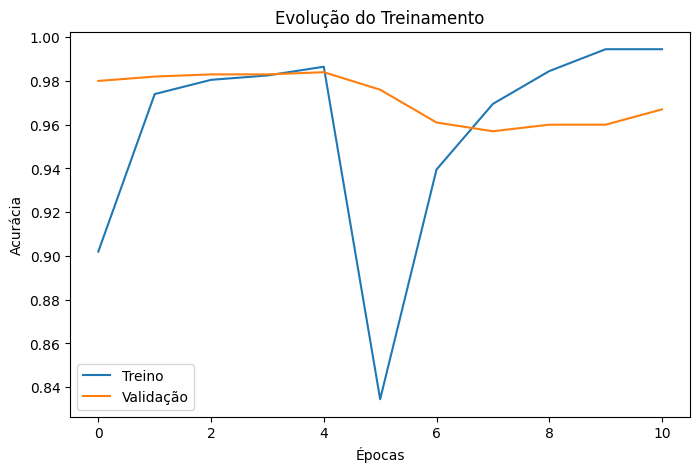

In [8]:
acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']


plt.figure(figsize=(8,5))
plt.plot(acc, label='Treino')
plt.plot(val_acc, label='Validação')
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.title("Evolução do Treinamento")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 854ms/step
Predição: GATO 🐱 (Probabilidade: 0.00)


C:\Users\felip\AppData\Local\Temp\ipykernel_11972\54984186.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Predição: {label} (Probabilidade: {float(prediction):.2f})")


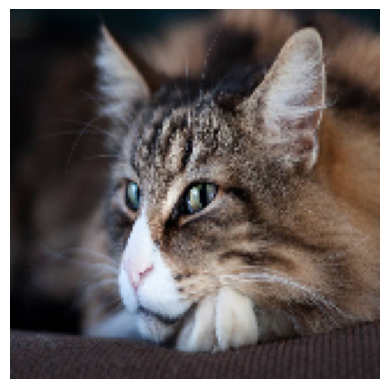

In [9]:
# Célula – Testar uma imagem
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Caminho da imagem a testar
img_path = "teste3.jpg"  # Substitua pelo caminho da sua imagem
IMG_SIZE = 160  # mesmo tamanho usado no treino

# Carregar e redimensionar a imagem
img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # adiciona batch dimension
img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

# Fazer a predição
prediction = model.predict(img_array)

# Interpretar resultado
if prediction < 0.5:
   label = "GATO 🐱"
else:
   label = "CACHORRO 🐶"

print(f"Predição: {label} (Probabilidade: {float(prediction):.2f})")

# Mostrar imagem
plt.imshow(img)
plt.axis('off')
plt.show()
